In [97]:
## add a button here to hide and reveal all code.

## RR Serial Chain manipulator force map

The objective of this analysis is to demonstrate how the shape of the torque space maps through the jacobian into force at the end effector for a RR serial chain manipulator. 

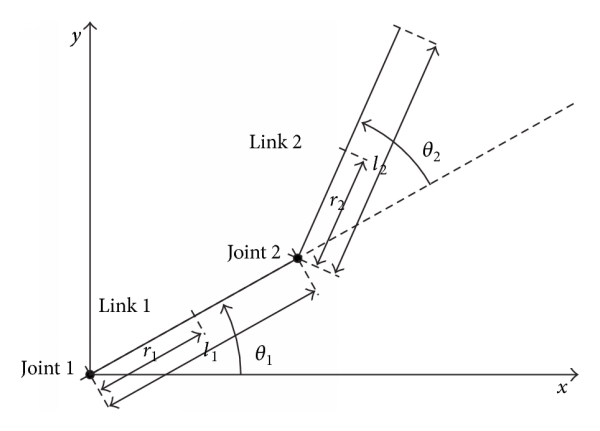

<!-- 
$$ J(\Theta) = 
 
 \begin{bmatrix}
    1      & X_{11} & X_{12} & ... & & X_{1,p-1}\\
    1      & X_{21} & X_{22} & ... & & X_{2,p-1}\\
    \vdots & \vdots & \vdots &     & & \vdots\\
    1      & X_{n1} & X_{n2} & ... & & X_{n,p-1}\\
  \end{bmatrix}
  
$$
 -->

### statically evaluate the shape of the jacobian at a test condition, and see how different torque spaces map to end effector force spaces

In [1]:
import numpy as np
from matplotlib import pyplot as plt


In [13]:
#evaluate the jacobian of an RR robot at a test location
l_1 = 1
l_2 = 1
θ_1 = 30
θ_2 = 30

jac = np.array([[l_1 * np.sin(θ_1 * np.pi/180), l_2 + l_1*np.sin(θ_2 * np.pi/180)], 
                [0                   ,          l_2                              ]])

jac

array([[0.5, 1.5],
       [0. , 1. ]])

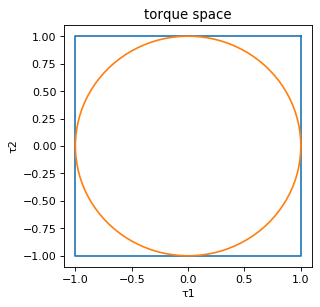

In [3]:
#plot the two torque space inputs

#hand make a square - this is the shape of the force space
tau_sqr = np.array([[1,1],[1,-1],[-1,-1],[-1,1],[1,1]])  # [x;y], each column is a point
tau_sqr = np.transpose(tau_sqr)

#let's do the same thing for a circle
t = np.linspace(0,2*np.pi,100)
x = np.cos(t) ; y = np.sin(t)
tau_circ = np.vstack((x,y))

#plot ontop of eachother
plt.figure(num=None, figsize=(4, 4), dpi=80, facecolor='w', edgecolor='r')
plt.title("torque space")
plt.xlabel("τ1")
plt.ylabel("τ2")
plt.plot(tau_sqr[0,:],tau_sqr[1,:])
plt.plot(tau_circ[0,:],tau_circ[1,:])

<IPython.core.display.Javascript object>


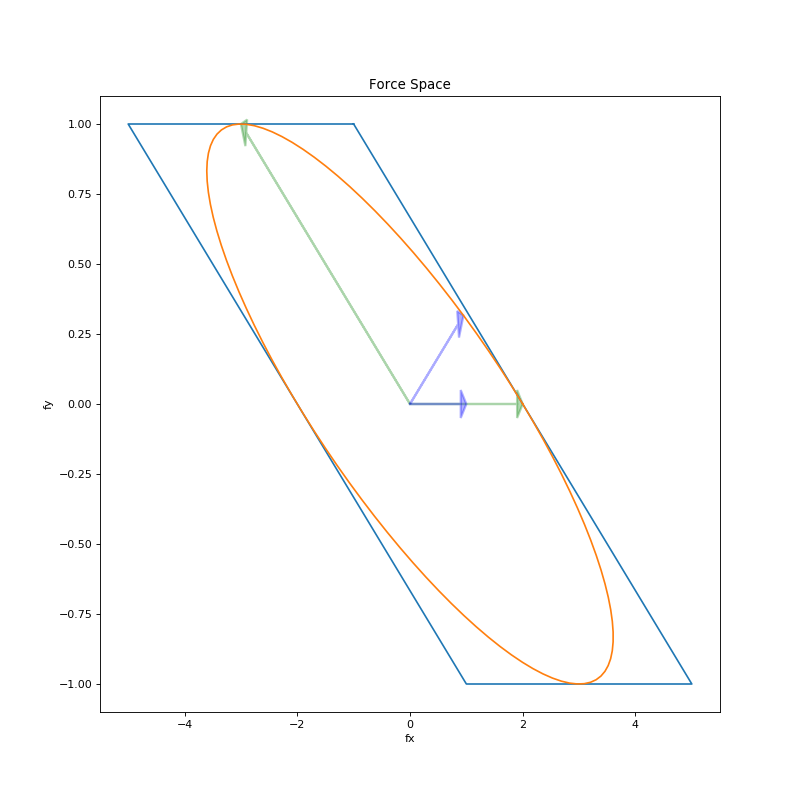

In [30]:
#how do the torques map through the jacobian into end-effector force space?
f_sqr = np.matmul(np.linalg.inv(jac), tau_sqr)
f_circ = np.matmul(np.linalg.inv(jac), tau_circ)
f_unit = np.matmul(np.linalg.inv(jac),np.eye(2))




#plot the end effector force space
plt.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='r')
plt.title("Force Space")
plt.xlabel("fx")
plt.ylabel("fy")

plt.plot(f_sqr[0,:],f_sqr[1,:])
plt.plot(f_circ[0,:],f_circ[1,:])

ax = plt.gca()

#plot where the unit torque map
ax.arrow(0,0,f_unit[0,0],f_unit[1,0], alpha = .3, color = "green" ,linewidth = 2 ,head_width = .1, head_length = .1, length_includes_head = True)
ax.arrow(0,0,f_unit[0,1],f_unit[1,1], alpha = .3, color = "green" ,linewidth = 2 ,head_width = .1, head_length = .1, length_includes_head = True)

#plot the eign vectors of the linear transformation of the jacobian
w, v = LA.eig(np.linalg.inv(jac))
#w, v = LA.eig(jac)
ax.arrow(0,0,v[0,0],v[1,0], alpha = .3, color = "blue" ,linewidth = 2 ,head_width = .1, head_length = .1, length_includes_head = True)
ax.arrow(0,0,v[0,1],v[1,1], alpha = .3, color = "blue" ,linewidth = 2 ,head_width = .1, head_length = .1, length_includes_head = True)




array([[1.        , 0.9486833 ],
       [0.        , 0.31622777]])

In [19]:
f_unit

array([[ 2., -3.],
       [ 0.,  1.]])

Thus, we see that the torque space is mapped through a **linear transformation**  to the end effector space via the jacobian. a square torque space becomes a circular 

### Build an interactive RR force space viewer to build an intuition of torque space maps to force space as a function of position.


<IPython.core.display.Javascript object>


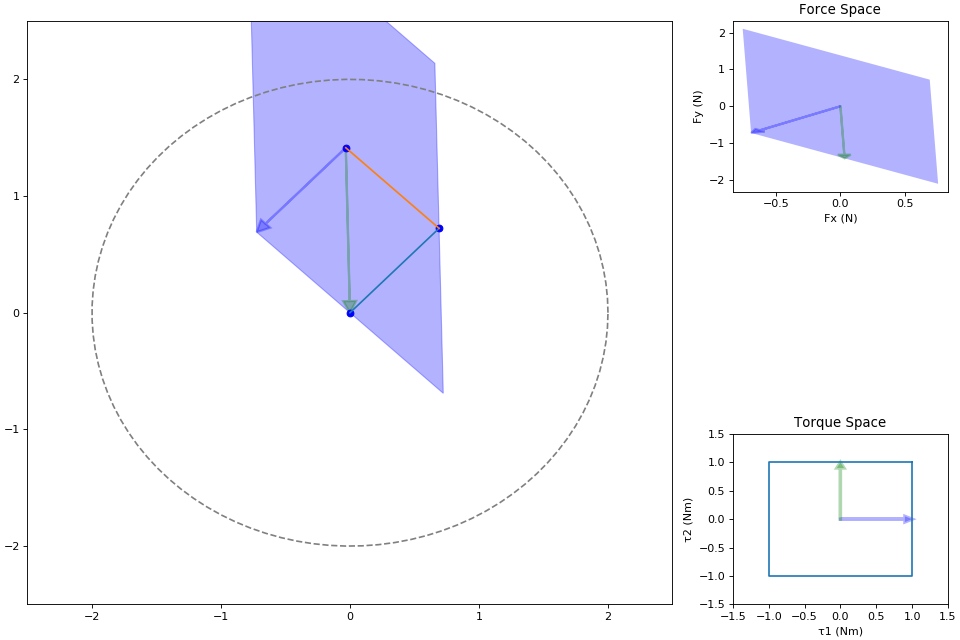

interactive(children=(FloatSlider(value=0.7853981633974483, description='θ1', max=3.141592653589793, min=-3.14…

In [5]:
%matplotlib notebook
#%matplotlib widget

from ipywidgets import interact
import ipywidgets as widgets
import matplotlib.gridspec as gridspec


#setup plot and axes
fig = plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='r',constrained_layout=True)
spec = gridspec.GridSpec(ncols=4, nrows=3, figure=fig)
robot_ax = fig.add_subplot(spec[:, 0:3])
fs_ax    = fig.add_subplot(spec[0,3])
jac_ax   = fig.add_subplot(spec[1,3])
ts_ax    = fig.add_subplot(spec[2,3])


#plot the static elements of the graphic

#constants
l1 = 1
l2 = 1

#plot the torque space 
tau_sqr = np.array([[1,1],[1,-1],[-1,-1],[-1,1],[1,1]])  # [x;y], each column is a point
tau_sqr = np.transpose(tau_sqr)
ts_ax.set_title("Torque Space")
ts_ax.set_xlabel("τ1 (Nm)")
ts_ax.set_ylabel("τ2 (Nm)")
ts_ax.plot(tau_sqr[0,:],tau_sqr[1,:])  #fix this so it doesn't require running other cells
ts_ax.arrow(0, 0, 1, 0, color = "blue" ,alpha = .3, linewidth = 3 ,head_width = .1, head_length = .1, length_includes_head = True) 
ts_ax.arrow(0, 0, 0, 1, color = "green",alpha = .3, linewidth = 3 ,head_width = .1, head_length = .1, length_includes_head = True)
ts_ax.set_xlim(-1.5, 1.5); ts_ax.set_ylim(-1.5,1.5);

#setup the labels on the force space
fs_ax.set_title("Force Space")
fs_ax.set_xlabel("Fx (N)")
fs_ax.set_ylabel("Fy (N)")

#configure the jacobian pannel
jac_ax.axis('off')


#make the plots interactive
θ1 = widgets.FloatSlider(min= -np.pi, max= np.pi, step=.05, value=np.pi / 4)
θ2 = widgets.FloatSlider(min= -np.pi, max= np.pi, step=.05, value=np.pi /2)
scale = widgets.FloatSlider(min = .05,max = 1, step = .05, value = 1)



@interact
def plotRRrobot(θ1 = θ1, θ2 = θ2,  scale = scale):
    
    #---------------- robot plot -------------------
    #clear the current axis
    robot_ax.cla()
    
    #define sin and cosine constants for this evaluation
    s1  = np.sin(θ1)      ; c1  = np.cos(θ1)
    s2  = np.sin(θ2)      ; c2  = np.cos(θ2)
    s12 = np.sin(θ1 + θ2) ; c12 = np.cos(θ1 + θ2)
    
    #set the absolute limits, workspace limits
    lmax = l1 + l2 ; lim = lmax * 1.25
    robot_ax.set_xlim(-lim, lim); robot_ax.set_ylim(-lim, lim); #set scale
    #robot_ax.set_aspect('equal')
    t = np.linspace(0,2*np.pi,100);
    x = lmax * np.cos(t) ; y = lmax * np.sin(t)
    robot_ax.plot(x,y, color = 'gray', linestyle = 'dashed')
    
    #forward kinematics
    origin = [0,0]
    l1_tip = [l1*c1 , l1*s1]                                     
    l2_tip = [l1_tip[0] + l2*c12, l1_tip[1] + l2*s12]
    
    #plot joint and end effector locations
    robot_ax.plot(origin[0],origin[1], 'bo')
    robot_ax.plot(l1_tip[0],l1_tip[1], 'bo')
    robot_ax.plot(l2_tip[0],l2_tip[1], 'bo')

    #plot links
    link1 = np.vstack((origin,l1_tip)).transpose()
    link2 = np.vstack((l1_tip,l2_tip)).transpose()
    robot_ax.plot(link1[0,:],link1[1,:])
    robot_ax.plot(link2[0,:],link2[1,:])
    
    #calculate the jacobian 
    jac = np.array([[-l1*s1 - l2*s12   ,l1*c1 +l2*c12   ], 
                    [-l2*s12           , l2*c12         ]])
    
    #plot the force space using fill between
    f_sqr = np.matmul(np.linalg.inv(jac), tau_sqr)
    ##handle here if the inverse doesn't exist... (try, except)
    ##handle 
    f_sqr_fk = np.vstack((f_sqr[0,:]*scale + l2_tip[0] ,f_sqr[1,:]*scale + l2_tip[1]));
    robot_ax.fill(f_sqr_fk[0,:],f_sqr_fk[1,:],color = 'blue', alpha = .3)
    
    #plot the arrows on the force space
    upArrow = np.array([[0],[1]])                    ; rightArrow = np.array([[1],[0]])
    upArrow = np.matmul(np.linalg.inv(jac), upArrow) ; rightArrow = np.matmul(np.linalg.inv(jac), tau_sqr)
    upArrow = scale * upArrow                        ; rightArrow = scale * rightArrow
    robot_ax.arrow(l2_tip[0],l2_tip[1],upArrow[0,0], upArrow[1,0]      , alpha = .3, color = "green" ,linewidth = 2 ,head_width = .1, head_length = .1, length_includes_head = True) 
    robot_ax.arrow(l2_tip[0],l2_tip[1], rightArrow[0,0],rightArrow[1,0], alpha = .3, color = "blue"  ,linewidth = 2 ,head_width = .1, head_length = .1, length_includes_head = True)

    
    
    #----------------- force space plot ------------------
    fs_ax.cla()
    fs_ax.set_title("Force Space")
    fs_ax.set_xlabel("Fx (N)")
    fs_ax.set_ylabel("Fy (N)")
    fs_ax.fill(f_sqr[0,:],f_sqr[1,:],'b',alpha = .3)
    upArrow = upArrow / scale; rightArrow = rightArrow / scale
    fs_ax.arrow(0,0,upArrow[0,0], upArrow[1,0]      , alpha = .3, color = "green" ,linewidth = 2 ,head_width = .1, head_length = .1, length_includes_head = True) 
    fs_ax.arrow(0,0,rightArrow[0,0],rightArrow[1,0], alpha = .3, color = "blue"  ,linewidth = 2 ,head_width = .1, head_length = .1, length_includes_head = True)

    
    #------------------- jacobian plot -------------------
    #jac_ax.cla()
    cond = np.linalg.cond(jac)
    det =  np.linalg.det(jac)
    #jac_ax.text(.5,.5,str(det))
    print(det)
#     jac_ax.text(0, 0.1, r'$\delta$',
#          {'color': 'black', 'fontsize': 24, 'ha': 'center', 'va': 'center',
#           'bbox': dict(boxstyle="round", fc="white", ec="black", pad=0.2)})
    
 
    fig.show()





# to do:
    * test fill between
    * implement fill between 
    * get the 3 plot graphic working w/ determinant
    * extend the 
    
   
* add vectors to this (green and blue quiver looking things), which are the principle vectors, so we can watch as they 


## make a color map of the whole space, both in terms of condition number, and f and x capability? 

plan: 
* we want to make an interaction plot (color map) in which the color of plot indicates the degree to which the robot can resist the human's force production for a given strength multiplier, at a particular position. 
* we will do this through a brute force sampling of the space. 
* steps: 
    * discritize the human joint space.
    * propogate the FK of the human. 
    * determine if the end effector is located in a shared space
        *if not, discard
        * if so, perform the IK on the robot so they are in the same position.
    * propagate the joint torques through the human and the robot
    * determine if the human's force space unit vectors can be constructed with a linear combination of the robot's vectors, the a coefficient of less than 1 on each, or some other metric for goodness of fit, in which overlapping force parellelagrams gives 1, and a singularity interacting with a non-singular force space gives zero. this is basically area of overlap?

last time we looked at force space trapezoids
<img src="./imgs/force_trapazoid.png">

if we restrict ourselves to a circle in joint torque space (iso -effort) this leads to elipsoids
<img src="./imgs/force_elipsoid.png">

there is a duality between force elipsoids and manipulability elipsoids

<img src="./imgs/manipulability_vs_force elipsoid.png">

# $$ A_{elipse} = \pi ab$$  $$A_{m} = \pi ab$$ $$A_{f} = \pi \frac{1}{a} \frac{1}{b}$$

* the product is a constant (power)

## potential performance metrics

<img src="./imgs/performanceCriteria1.png">

* does the human force space fit within the robot's force space?
* can "cheat by increasing the size of the robot's force space
* varies from 0 - 1, with saturation at 1

<img src="./imgs/performanceCriteria2.png">

* look at ratio of areas 
* penalize for angular a size missalignments, including robot workspace being too large
* 0 - 1



In [49]:
#change of basis example? 
nb = np.array([[1, 0],[1, 1]])
nbi = LA.inv(nb)
v = np.array([[1],[1]])


nbi @ v


array([[1.],
       [0.]])

#### what are you trying to create? 
1. a scoring function to assess the goodness of fit between two force spaces  X
2. an interactive view of the optimization landscape with plotly
3. a 3D graph of the optimzation landscape as you allow x1 and x2 to vary
4. a solution using scipy.optimize.minimize.
5. a proposal for where this is going in the future (some pictures for the next week) 

other things to do:
* fix polygon bug in score
* profile and see if there is some huge bottleneck that can be fixed
* if not, implement cache system
* implement function to score a whole position (in joint space perhaps?) 
* implement visualization of optimization landscape, with tracer dot
* perform optimization

In [55]:
#------------- imports --------------
import plotly.graph_objs as go
import numpy as np
from ipywidgets import interact , Layout , FloatSlider
from numpy import linalg as LA
from shapely.geometry import Polygon
from scipy.spatial import ConvexHull


#------------- classes ------------------
class TauSpace():
    """define a torque space"""
    def __init__(self,t1max,t1min,t2max,t2min):
        self.t1max = t1max
        self.t1min = t1min
        self.t2max = t2max
        self.t2min = t2min
    def corners(self):
        """return the corners of the torque space polygon in CCW order from top right"""
        cs = np.array([[self.t1max,self.t1min,self.t1min,self.t1max],
                       [self.t2max,self.t2max,self.t2min,self.t2min]])
        return cs
    
    #define polygon more organically? 
        

#------------- globals ------------------
#vars
H1 = 1  ; H2 = 1  #human limb lengths 
R1 = 1  ; R2 = 1  #robot link lengths



#--------- helper functions -------------
def mkCircle(x0,y0,r):
    t = np.linspace(0,2* np.pi,100)
    x = r * np.cos(t) + x0
    y = r * np.sin(t) + y0
    return x,y


def circIntersection(x1,y1,r1,x2,y2,r2):
    """characterize circle intersection"""
    dx = x2-x1; dy = y2-y1
    hyp = (dx**2 + dy**2)**.5
    if hyp > (r1 + r2):
        intersect = False
    else:
        intersect = True
    ipt = (x1 + (dx/2), y1 + (dy/2))
    ang = np.arctan2(dy,dx)
    return (ipt,ang,intersect)

def withinIntersection(x1,y1,r1,x2,y2,r2,pt):
    """is the point contained within the intersection?"""
    def within(x,y,r,pt):
        dx = pt[0] - x ; dy = pt[1] - y
        hyp = (dx**2 + dy**2)**.5
        return r > hyp
    
    return (within(x1,y1,r1,pt) and within(x2,y2,r2,pt))


def FK(θ1,θ2,l1,l2):
    """forward kinematics of an RR robot"""
    s1  = np.sin(θ1)      ; c1  = np.cos(θ1)
    s2  = np.sin(θ2)      ; c2  = np.cos(θ2)
    s12 = np.sin(θ1 + θ2) ; c12 = np.cos(θ1 + θ2)
    
    #forward kinematics
    origin = [0,0]
    l1_tip = [l1*c1 , l1*s1]                                     
    l2_tip = [l1_tip[0] + l2*c12, l1_tip[1] + l2*s12]
    return (l1_tip,l2_tip)
 
    
def FKplot(θ1,θ2,l1,l2):
    """return the x's and y's to plot a robot"""
    l1_tip,l2_tip = FK(θ1,θ2,l1,l2)
    xs = np.array([0,l1_tip[0],l2_tip[0]])
    ys = np.array([0,l1_tip[1],l2_tip[1]])
    return xs,ys
  
    
def IK(x,y,l1,l2,flipElbow = False):
    """inverse kinematics of an RR robot"""   
    θ2 = np.arccos((x**2 + y**2 - l1**2 - l2**2) / (2*l1*l2))
    β = np.arctan2(y,x)
    γ =  - np.arcsin((l2*np.sin(θ2)) / (x**2 + y**2)**.5)
    
    if not flipElbow:
        θ1 = β + γ 
    if flipElbow:
        θ2 = -θ2
        θ1 = β - γ 
        
    return (θ1,θ2)

def Jac(θ1,θ2,l1,l2):
    """return the jacobian of an RR robot given joint angles"""
     #define sin and cosine constants for this evaluation
    s1  = np.sin(θ1)      ; c1  = np.cos(θ1)
    s2  = np.sin(θ2)      ; c2  = np.cos(θ2)
    s12 = np.sin(θ1 + θ2) ; c12 = np.cos(θ1 + θ2)
    
    #calculate the jacobian 
    jac = np.array([[-l1*s1 - l2*s12   ,l1*c1 +l2*c12   ], 
                    [-l2*s12           , l2*c12         ]])
    return jac
    
    

def Score(τsH,τsR,ΘH,ΘR,mode = "normalize"):
    """
    inputs: 
        τsH - the torque space of the human (type = TauSpace)
        τsR - the torque space of the robot (type = TauSpace)
        ΘH - the force jacobian of the human (2x2 np.array)
        θR - the force jacobian of the robot (2x2 np.array)
        mode - flag to signal what mode is being used (string)
    outputs: 
        score assessing how well the two jacobians overlap (float on 0-1)
    """
    
    #test that the robot or human are not too close to a singularity, if they are
    #just return zero to avoid dealing with numericial issues. 
    ϵ = 100    #condition numbers exist on (1- infinity)
    if (LA.cond(ΘH) > ϵ or LA.cond(ΘR) > ϵ):
        return 0 
    
    #find the force polygons
    
    fpolyH = τs2ForcePolygon(τsH,ΘH)
    fpolyR = τs2ForcePolygon(τsR,ΘR)
    
    #determine the score based on area
    intersection = fpolyH.intersection(fpolyR)
    if mode == "normalize":
        return intersection.area / (fpolyH.area + fpolyR.area - intersection.area)
    elif mode == "inscribed":
        return intersection.area / fpolyH.area
    

    
def τs2ForcePolygon(τs,Θ):
    cs = (Θ @  τs.corners()).T
    fcs = [(cs[i,0], cs[i,1]) for i in range(cs.shape[0])]
    return Polygon(fcs)
    
        

# def Score1(R_basis,H_basis):
#     """
#     represent H withing the R basis , and determine if H is contained withing R 
#     returns score which saturates on 0-1
#     """
#     try:
#         R_inv = LA.inv(R_basis);
#         H_in_R_basis = r_inv * h_basis
#         return min(1 , LA.norm(H_in_R_basis,np.inf))
#     except:
#         return 0 #we are at a singularity of R_basis


def genEvalBox(x1,y1,r1,x2,y2,r2,nSamps = 10): 
    """
    given 2 circles(defined by their coordinates,
    generate coordinates over which to evaluate
    input:
        density - [samples / normalized length]
    output:
        x - np.array of x values to sample over
        y - np.array of y values to sample over
    """
    #identify critical points on each circle
    def pts(x,y,r): #[right,top,left,bottom]
        return  np.array([[r, 0,-r, 0],
                          [0, r, 0,-r]]) + np.array([[x],[y]])
    pts1 = pts(x1,y1,r1) ; pts2 = pts(x2,y2,r2)
    
    #find the corners of the box w/ mini-max and maxi-min problem
    tl = (min(pts1[0,0],pts2[0,0]),min(pts1[1,1],pts2[1,1]))
    br = (max(pts1[0,2],pts2[0,2]),max(pts1[1,3],pts2[1,3]))
    dx = tl[0] - br[0]
    dy = tl[1] - br[1]  
#     x = np.linspace(br[0],tl[0],int(density * dx))
#     y = np.linspace(br[1],tl[1],int(density * dy))
    x = np.linspace(br[0],tl[0],nSamps)
    y = np.linspace(br[1],tl[1],nSamps)
    
    return x,y

def ScoreIntersectedSpace(x1,y1,r1,x2,y2,r2,FR,mode = "normalize"):
    """
    score the area of intersection between the human and the robot
    and return the parameters of the contour plot
    input: 
        circle parameters - for the two workspaces of the robots. 
        FR - force ratio, how much stronger the robot is than the human.
        mode - normalized or not?
    output:
        X - 1d np.array of length n
        Y - 1d np.array of length m
        Z - 2d np.array of size n x m       
    """
    #where to sample in x,y coordinates
    nSamps = 27
    X , Y = genEvalBox(x1,y1,r1,x2,y2,r2,nSamps)
    Z = np.zeros((X.shape[0],Y.shape[0]))
    Z = np.full_like(Z, np.nan)
    
    #define the torque spaces for the robot and human
    τsH = TauSpace(1,-1,1,-1);
    τsR = TauSpace(FR,-FR,FR,-FR);
    
    #for each point, evaluate the score
    for i,x in enumerate(X):
        for j,y in enumerate(Y):
            if withinIntersection(x1,y1,r1,x2,y2,r2,(x,y)):
                        
                #determine the joint angles
                Hθ1,Hθ2 = IK(x,y,H1,H2)
                Rθ1,Rθ2 = IK(x - x2,y - y2,R1,R2)
                
                #calculate the jacobians
                ΘH = Jac(Hθ1,Hθ2,H1,H2)
                ΘR = Jac(Rθ1,Rθ2,R1,R2)
                
                #score the jacobian intersections
                Z[i,j] = Score(τsH,τsR,ΘH,ΘR,mode)
    
    return X,Y,Z

#------------- tests -------------------
def test_PolygonLT():
    #define a torque space
    τs = TauSpace(-1,1,-1,1)
    count = 0

    #let's test the area of the polygon for a variety of jacobians
    n =  100
    θs = np.linspace(0,2*np.pi,n)
    for i,θ1 in enumerate(θs):
        for j,θ2 in enumerate(θs):
            Θ = Jac(θ1,θ2,1,1)
            poly = τs2ForcePolygon(τs,Θ)

            #is the calculated area wrong? 
            ϵ = .001;
            if ( abs(poly.area - abs(np.linalg.det(Θ) * 4))  > ϵ):
                count += 1
    np.testing.assert_equal(count, 0)

testFlag = True
if testFlag:
    test_PolygonLT()
    

        
#-------- plotting routines -------------
#init figure
X,Y,Z = ScoreIntersectedSpace(0,0,2,1,0,2,1,mode = "normalized")
_fig = go.Figure(data = go.Contour(z=Z,x=X,y=Y))
fig = go.FigureWidget(_fig)



#manually configure axes and aspect ratio
fig.update_xaxes(range=[-6, 6])
fig.update_yaxes(range=[-6, 6])
side = 1000
fig.update_layout(
    autosize=False,
    width=side + 100,
    height=side,
    legend=dict(x=.025, y=.975))


#make plot with original circle, and model robot in it.
(xs,ys) = mkCircle(0,0,H1 + H2);
fig.add_scatter(x=xs,y=ys,line=dict(dash='dash',color='royalblue'),name="human workspace")
fig.add_scatter(line=dict(color='royalblue', width=2)             ,name="leg")
fig.add_scatter(line=dict(dash='dash',color='red')                ,name="robot workspace")
fig.add_scatter(line=dict(color='red', width=2)                   ,name="robot")


line=dict(color='firebrick', width=4)

#setup slider objects
layout=Layout(width='700px', height='20px')
rng = 4 ; step = .1
x1 = FloatSlider(min=-rng,max=rng,step=step,value=1, layout=layout)
y1 = FloatSlider(min=-rng,max=rng,step=step,value=0, layout=layout)
FR = FloatSlider(min=1 ,max=5,step=0.1,value=1, layout=layout)

@interact(mode=["none","normalize","inscribed"],x1=x1, y1=y1,FR=FR)
def update(mode="none",x1=1, y1=0, FR=1):
    with fig.batch_update():
        
        #draw the contour plot of the scoring function
        if mode == "none":
            pass
#             #set visability to false
#             xRange,yRange = genEvalBox(0,0,H1 + H2,x1,y1, R1 + R2)
#             fig.data[0]['x'] = xRange
#             fig.data[0]['y'] = yRange
#             fig.data[0]['z'] = np.ones((xRange.shape[0],yRange.shape[0]))
            
        if (mode == "normalize" or mode == "inscribed"):
            xs,ys,zs = ScoreIntersectedSpace(0,0,H1 + H2,x1,y1, R1 + R2,FR,mode)
            fig.data[0]['x'] = xs
            fig.data[0]['y'] = ys
            fig.data[0]['z'] = zs        
    
        #draw the robot circle
        xs,ys = mkCircle(x1,y1,R1 + R2)
        fig.data[3]['x']=xs
        fig.data[3]['y']=ys
        
        #draw the two robots at the center of the workspaces
        (ipt,ang,intersect) = circIntersection(0,0,H1 + H2,x1,y1, R1 + R2)    
        if intersect:
            #human
            θ1,θ2 = IK(ipt[0],ipt[1],H1,H2,flipElbow = True)
            xs, ys = FKplot(θ1,θ2,H1,H2)
            fig.data[2]['x']= xs
            fig.data[2]['y']= ys
            
            #robot
            θ1,θ2 = IK(ipt[0] - x1,ipt[1] - y1,R1,R2)
            xs, ys = FKplot(θ1,θ2,R1,R2)
            fig.data[4]['x']= xs + x1
            fig.data[4]['y']= ys + y1
                  

#display interactive figure
fig

interactive(children=(Dropdown(description='mode', options=('none', 'normalize', 'inscribed'), value='none'), …

FigureWidget({
    'data': [{'type': 'contour',
              'uid': 'ed9c8344-2ebd-4f63-b3e1-a4e70d95ebba',
 …

to do:  
* protect IK from bad calls
* fix the bounding box on your contour plot (or at least investingate it) 
* prove equivalence of area overlap and actuator effort metric (graphically), and in terms of solution space
* do a proper post modem and planning session for the future of this analysis. 

## Plot the solution space

In [52]:
#from IPython.display import display
#display(x1,y1)  #rely on previously defined sliders


#import warnings
#warnings.filterwarnings('ignore')

#--------------- plotting fxns ------------
#save a fxn to disk
X = np.arange(-rng,rng,step)  
Y = np.arange(-rng,rng,step)
Z = np.load("./bin/SR.npy")

#let's plot the surface

#init figureWidget
_fig = go.Figure(data=[go.Surface(z=Z, x=X, y=Y),
                       go.Scatter3d(z=[0],x=[0],y=[0],mode='markers', marker=dict(opacity=0.8,size=12,color=[1],colorscale='Viridis'))])
fig2 = go.FigureWidget(_fig)

fig2.update_layout(title='Optimization response Surface', autosize=False,
                  width=800, height=800)

@interact(x1=x1,y1=y1)
def update(x1=1,y1=0):  
    with fig2.batch_update():
        #update point based on sliders
        i = np.where(X.round(2)==x1)[0][0]
        j = np.where(Y.round(2)==y1)[0][0]
        
        r = .01 #radius of the ball
        fig2.data[1]['x']= [x1]
        fig2.data[1]['y']= [y1]
        fig2.data[1]['z']= [Z[i,j] + r]
        
        
        
fig2.update_traces()


interactive(children=(FloatSlider(value=-0.5, description='x1', layout=Layout(height='20px', width='700px'), m…

FigureWidget({
    'data': [{'type': 'surface',
              'uid': '463f7720-8491-4fcb-ba6b-f7bfb2f1ad99',
 …

In [ ]:
def genSolutionSpace(FR = 1, mode = "normalize"):
    """
    generate a response surface of the optimization space 
    """
    X = np.arange(-rng,rng,step);  Y = np.arange(-rng,rng,step)
    SS = np.zeros((X.shape[0],Y.shape[0]))
    for i,x in enumerate(X):
        print("row" + str(i))
        for j,y in enumerate(Y):
            _,_,zs = ScoreIntersectedSpace(0,0,H1 + H2,x,y, R1 + R2,1,mode)
            SS[i,j] = np.nanmean(zs)
    return SS


#go calculate this thing in a different thread
import concurrent.futures

with concurrent.futures.ThreadPoolExecutor() as executor:
    future = executor.submit(genSolutionSpace)
    SS = future.result()

### Optimization

In [8]:
def objFxn(params):
    x = params[0]; y = params[1]
    _,_,zs = ScoreIntersectedSpace(0,0,H1 + H2,x,y, R1 + R2,1,mode="normalize")
    return -np.nanmean(zs) 

#call scipy,optimize.minimize
from scipy.optimize import minimize
res = minimize(objFxn,(1,0),method = 'nelder-mead')


<ipython-input-1-1dfc5ab4fe28>:89: RuntimeWarning:

invalid value encountered in arcsin



ValueError: Points cannot contain NaN

to do (on this problem): 
* does sampling in joint space instead of x,y space remove some of the surface roughness?
* optimize that the inner loop evaluation time (get rid of call to cvx hull)
* formulate in a baysian optimization framework w/ sobol sampling
* develop intuition with visualizations
* think about rephrasing the problem in terms of minimizing actuator effort
* explore julia robotics package
* think about alternative ways of solving the area of overlap problem. 


to do(on full problem):
* formulate kinematics and joint limits for a human model
* parameterize the plausable robot model
* 


notes from 

### Scratch

In [76]:
import plotly.graph_objects as go


yy = FloatSlider(min=1 ,max=36,step=0.1,value=28, layout=layout)
_fig2 = go.Figure(data =
    go.Contour(
        z=[[10, 10.625, 12.5, 15.625, 20],
           [5.625, 6.25, 8.125, 11.25, 15.625],
           [2.5, 3.125, 5., 8.125, 12.5],
           [0.625, 1.25, 3.125, 6.25, 10.625],
           [0, 0.625, 2.5, 5.625, 10]],
        x=[-1, -.5, 0 , .5, 1], # horizontal axis
        y=[-1, -.5, 0, .5, 1] # vertical axis
    ))

#init figure
fig2 = go.FigureWidget(_fig2)
fig2.update_layout(title='Hinge Joint Space Surface', autosize=False,
                  width=500, height=500)

@interact(yy=yy)
def update(yy = 1):
    with fig2.batch_update():
        fig2.data[0]["y"] = [yy, -.5, 0, .5, 1] 
        fig2.update()
        
fig2.update_traces()






interactive(children=(FloatSlider(value=28.0, description='yy', layout=Layout(height='20px', width='700px'), m…

FigureWidget({
    'data': [{'type': 'contour',
              'uid': '64e11a22-7567-43fe-a5e4-b5704ebfc628',
 …

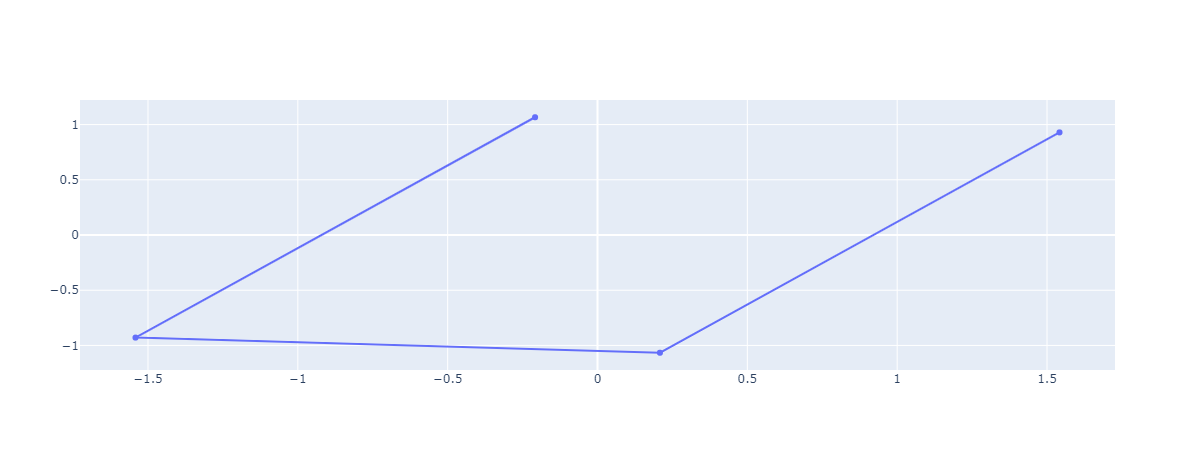

In [157]:
x = np.array([-0.20833333, -1.54166667,  0.20833333,  1.54166667])
y = np.array([ 1.0662811 , -0.92900195, -1.0662811 ,  0.92900195])

fig3 = go.Figure()
fig3.add_scatter(x=x,y=y)


def reformat(τs,Θ):
    cs = Θ @ τs.corners()
    fcs = [(cs[0,i], cs[1,i]) for i in range(cs.shape[1])]
    return Polygon(fcs)

poly = Polygon()

demonstrate that actuator effort is equivalent to jacobian overlap as a metric